In [2]:
import os
import zipfile
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [30]:
layerCnt = len(os.listdir('dcm'))
# layerCnt = 28

for i in range(1, layerCnt):
  # unzip
  if os.path.exists(f'dcm/{i}.dcm.zip'):
    with zipfile.ZipFile(f'dcm/{i}.dcm.zip', 'r') as zip_ref:
      zip_ref.extractall('dcm')

# remove zip files
for i in range(1, layerCnt):
  if os.path.exists(f'dcm/{i}.dcm.zip'):
    os.remove(f'dcm/{i}.dcm.zip')

pixel3d = []
for i in range(1, layerCnt):
  ds = pydicom.dcmread(f'dcm/{i}.dcm')
  pixel3d.append(ds.pixel_array)

pixel3d = np.array(pixel3d)
pixel3d = pixel3d[::-1]

In [32]:
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 2.25.138306544190732505595430725413044807725
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002,0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002,0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0018) SOP Instance UID                    UI: 2.25.138306544190732505595430725413044807725
(0008,0060) Modality                            CS: 'CT'
(0008,0070) Manufacture

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure

def plot_3d(image, threshold=-300):
  p = image.transpose(2,1,0)
  verts, faces, normals, values = measure.marching_cubes(p, threshold)
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  mesh = Poly3DCollection(verts[faces], alpha=0.1)
  face_color = [0.5, 0.5, 1]
  mesh.set_facecolor(face_color)
  ax.add_collection3d(mesh)
  ax.set_xlim(0, p.shape[0])
  ax.set_ylim(0, p.shape[1])
  ax.set_zlim(0, p.shape[2])

  plt.show()

ModuleNotFoundError: No module named 'skimage'

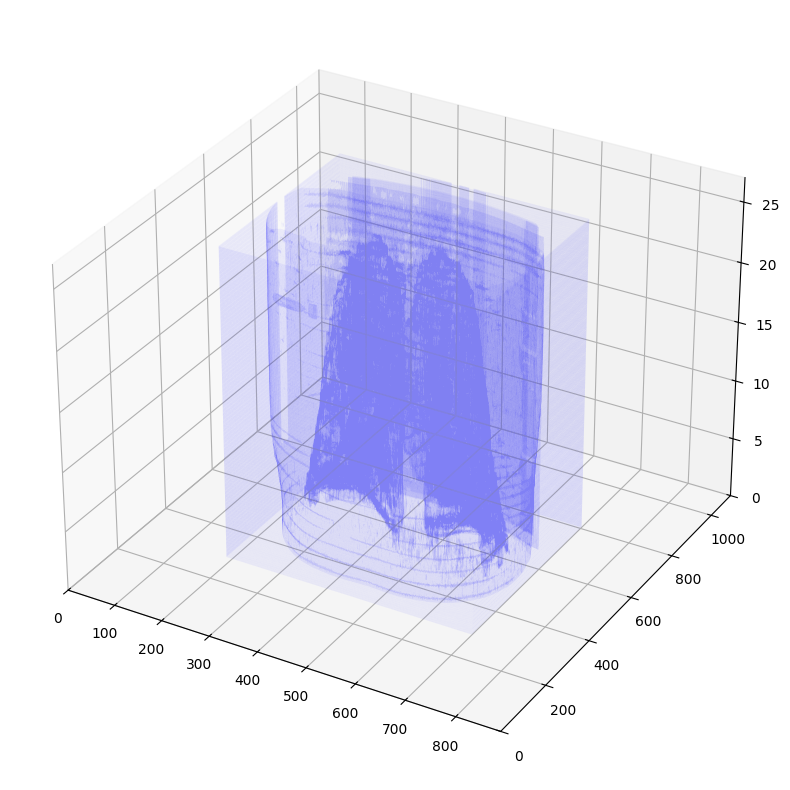

In [31]:
plot_3d(pixel3d)